In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14427326696910297402
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 918335961524586163
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8276041658203191310
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='0'

In [3]:
# import keras
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

# Select a One-Dimensional Function

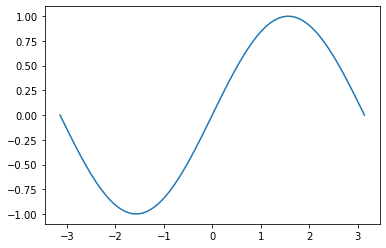

In [4]:
import numpy as np
import math
from math import sin
from matplotlib import pyplot
 
# sin(x)
def calculate(x):
	return sin(x)
 
# define inputs
inputs = np.linspace(-math.pi, math.pi, 120)
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

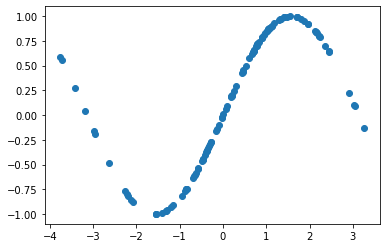

In [5]:
# example of generating random samples from sin(x)
from numpy.random import randn
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from sin(x)
def generate_samples(n = 120):
    # generate random inputs in [-pi , pi]
    X1 = (math.pi/2)*randn(n)
    
    # generate outputs sin(x)
    X2 = [sin(x) for x in X1]
    X2 = np.array(X2) # convert to np for reshape
    
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    return hstack((X1, X2))

# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

# Define a Discriminator Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


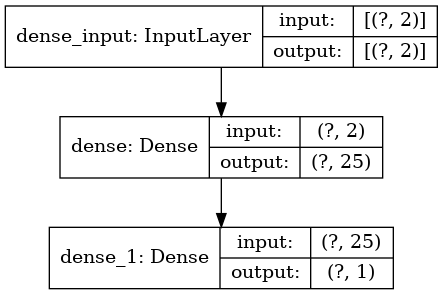

In [6]:
# define the discriminator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import randn
# generate n real samples with class labels
def generate_real_samples(n):
    # generate random inputs in [-pi , pi]
    X1 = (math.pi/2)*randn(n)

    # generate outputs sin(x)
    X2 = [sin(x) for x in X1]
    X2 = np.array(X2) # convert to np for reshape

    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    # generate class labels
    y = ones((n, 1))
    return X, y

# generate n fake samples with class labels
def generate_fake_samples(n):
    # generate inputs in [-2pi, 2pi]
    X1 = (math.pi)*randn(n)
    # generate outputs in [-2pi, 2pi]
    X2 = (math.pi)*randn(n)
    X2 = np.array(X2) # convert to np for reshape
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    # generate class labels
    y = zeros((n, 1))
    return X, y

# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch / 2)
    # run epochs manually
    for i in range(n_epochs):
        # generate real examples
        X_real, y_real = generate_real_samples(half_batch)
        # update model
        model.train_on_batch(X_real, y_real)
        # generate fake examples
        X_fake, y_fake = generate_fake_samples(half_batch)
        # update model
        model.train_on_batch(X_fake, y_fake)
        # evaluate the model
        _, acc_real = model.evaluate(X_real, y_real, verbose=0)
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        print(i, acc_real, acc_fake)

# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.0 1.0
1 0.0 1.0
2 0.0 1.0
3 0.015625 1.0
4 0.015625 1.0
5 0.03125 1.0
6 0.0 1.0
7 0.0 1.0
8 0.0 1.0
9 0.0 1.0
10 0.015625 1.0
11 0.015625 1.0
12 0.015625 1.0
13 0.046875 1.0
14 0.015625 1.0
15 0.03125 1.0
16 0.015625 1.0
17 0.015625 0.96875
18 0.015625 1.0
19 0.015625 0.96875
20 0.03125 1.0
21 0.03125 0.984375
22 0.0625 0.984375
23 0.015625 0.984375
24 0.03125 1.0
25 0.0 1.0
26 0.03125 1.0
27 0.0625 0.984375
28 0.0625 1.0
29 0.03125 1.0
30 0.0625 1.0
31 0.015625 1.0
32 0.109375 1.0
33 0.078125 1.0
34 0.078125 0.953125
35 0.046875 0.984375
36 0.0625 1.0
37 0.09375 1.0
38 0.03125 1.0
39 0.046875 0.96875
40 0.015625 0.984375
41 0.109375 0.96875
42 0.046875 0.953125
43 0.109375 0.984375
44 0.125 0.984375
45 0.09375 0.984375
46 0.09375 1.0
47 0.09375 0.96875
48 0.140625 0.9375
49 0.140625 1.0
50 0.125 0.96875
51 0.078125 1.0
52 0.203125 0.96875
53 0.171875 0.96875
54 0.171875 0.984375
55 0.125 0.96875
56 0.15625 0.9375
57 0.203125 0.984375
58 0.203125 1.0
59 0.15625 1.0
60 0.15625 0.953

420 0.90625 0.84375
421 0.953125 0.890625
422 0.90625 0.890625
423 0.921875 0.8125
424 0.953125 0.875
425 0.953125 0.84375
426 0.921875 0.890625
427 0.921875 0.78125
428 0.984375 0.84375
429 0.953125 0.765625
430 0.875 0.921875
431 0.875 0.90625
432 0.921875 0.8125
433 0.90625 0.8125
434 0.921875 0.90625
435 0.96875 0.765625
436 0.9375 0.828125
437 0.96875 0.859375
438 0.984375 0.75
439 0.953125 0.84375
440 0.953125 0.796875
441 0.9375 0.84375
442 0.9375 0.796875
443 0.90625 0.78125
444 0.96875 0.921875
445 0.890625 0.890625
446 0.875 0.84375
447 0.96875 0.734375
448 0.859375 0.765625
449 0.9375 0.796875
450 0.953125 0.875
451 0.953125 0.703125
452 0.9375 0.890625
453 0.9375 0.84375
454 0.921875 0.796875
455 0.921875 0.875
456 0.953125 0.796875
457 0.9375 0.765625
458 0.921875 0.859375
459 0.921875 0.828125
460 0.90625 0.875
461 0.921875 0.8125
462 0.984375 0.890625
463 0.9375 0.84375
464 0.890625 0.734375
465 0.96875 0.71875
466 0.953125 0.796875
467 0.96875 0.84375
468 0.9375 0.78125

822 0.96875 0.796875
823 0.9375 0.890625
824 0.875 0.828125
825 0.953125 0.796875
826 0.984375 0.828125
827 0.921875 0.828125
828 0.96875 0.765625
829 0.890625 0.875
830 0.96875 0.78125
831 0.96875 0.890625
832 0.90625 0.859375
833 0.96875 0.875
834 0.96875 0.875
835 0.9375 0.8125
836 0.9375 0.75
837 0.953125 0.8125
838 0.90625 0.765625
839 0.96875 0.828125
840 0.90625 0.796875
841 0.9375 0.828125
842 1.0 0.859375
843 0.921875 0.859375
844 0.875 0.875
845 0.9375 0.859375
846 0.9375 0.828125
847 0.96875 0.71875
848 0.9375 0.828125
849 0.921875 0.84375
850 0.90625 0.78125
851 0.90625 0.828125
852 0.953125 0.84375
853 0.96875 0.765625
854 0.984375 0.859375
855 0.96875 0.8125
856 0.921875 0.765625
857 0.984375 0.765625
858 0.9375 0.859375
859 0.9375 0.8125
860 0.9375 0.859375
861 0.953125 0.8125
862 0.875 0.828125
863 0.953125 0.8125
864 0.96875 0.90625
865 0.953125 0.78125
866 0.953125 0.8125
867 0.9375 0.8125
868 0.96875 0.84375
869 0.96875 0.75
870 0.984375 0.828125
871 0.96875 0.765625

# Define a Generator Model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


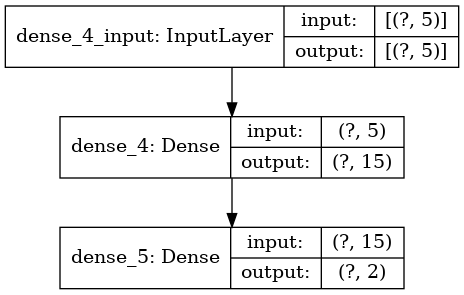

In [8]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# define the discriminator model
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

# Define GAN

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


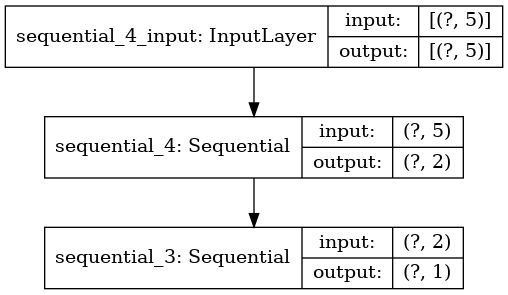

In [9]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

1999 0.18000000715255737 0.9700000286102295


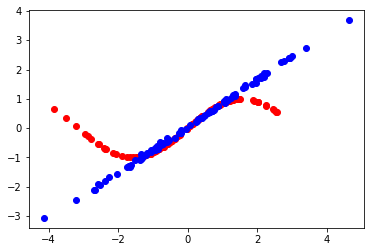

3999 0.5299999713897705 0.49000000953674316


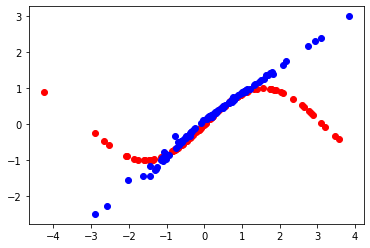

5999 0.41999998688697815 0.5199999809265137


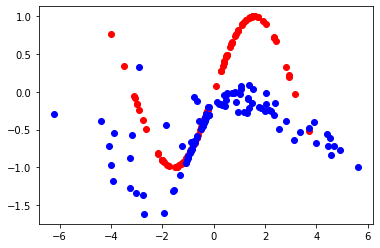

7999 0.4300000071525574 0.7300000190734863


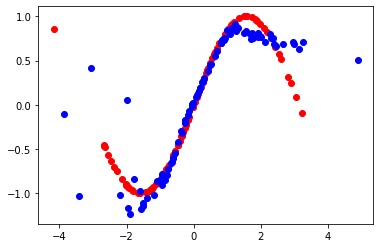

9999 0.6899999976158142 0.3799999952316284


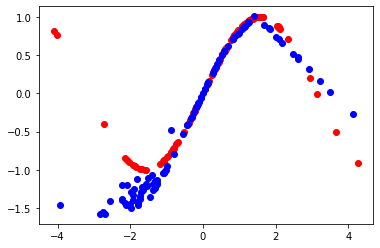

NameError: name 'plt' is not defined

In [11]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)

    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    pyplot.show()


def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = zeros((n, 1))
    return X, y
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs, n_batch, n_eval,D_loss_fake,D_loss_real,G_loss):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator
        d_loss_real,_= d_model.train_on_batch(x_real, y_real)
        d_loss_fake,_= d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        g_loss = gan_model.train_on_batch(x_gan, y_gan)
        
        D_loss_fake.append(d_loss_fake)
        D_loss_real.append(d_loss_real)
        G_loss.append(g_loss)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)


# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
D_loss_fake=[]
D_loss_real=[]
G_loss=[]
train(generator, discriminator, gan_model, latent_dim,10000,128,2000,D_loss_fake,D_loss_real,G_loss)


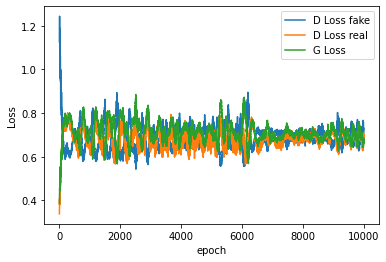

In [13]:
import matplotlib.pyplot as plt
x_axis = range(1,10000+1)
plt.plot(x_axis,D_loss_fake)
plt.plot(x_axis,D_loss_real)
plt.plot(x_axis,G_loss)
plt.legend(('D Loss fake', 'D Loss real','G Loss'),loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')

plt.show()